# Pre-processing of CP4 precipitation dataset for Leeds Met Office Hackathon - Ministry for Food and Agriculture, Guana Group

#### Using Iris for NetCDF data load and processing

##### Timothy Lam t.lam@exeter.ac.uk

#### Imports

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os

import iris

import iris.quickplot as qplt
import iris.coord_categorisation as coord_cat

import pandas as pd

import xarray as xr 

#### Set data path

In [3]:
DATA_PATH = '/gws/pw/j05/cop26_hackathons/leeds/CP4/explicit-4km/present/pr/'

#### Combine NetCDF files

In [3]:
precip_path = xr.open_mfdataset(DATA_PATH + 'explicit-4km_daily_pr_*_20W20E_00N25N.nc', concat_dim="time")

#precip_EXR1 = xr.open_mfdataset('Aphrodite/EXR1/APHRO*.nc',combine = 'by_coords', concat_dim="time")
print (precip_path)
#print (precip_EXR1)
#precip_EXR1.to_netcdf('Aphrodite_EXR1.nc')

<xarray.Dataset>
Dimensions:             (bnds: 2, latitude: 107, longitude: 114, time: 3600)
Coordinates:
  * latitude            (latitude) float64 0.1172 0.3516 0.5859 ... 24.73 24.96
  * longitude           (longitude) float64 -19.86 -19.51 -19.16 ... 19.51 19.86
  * time                (time) object 1997-03-01 12:00:00 ... 2007-02-30 12:00:00
Dimensions without coordinates: bnds
Data variables:
    a04203              (time, latitude, longitude) float32 dask.array<shape=(3600, 107, 114), chunksize=(30, 107, 114)>
    latitude_longitude  (time) int32 -2147483647 -2147483647 ... -2147483647
    time_bnds           (time, bnds) float64 dask.array<shape=(3600, 2), chunksize=(30, 2)>
Attributes:
    CDI:             Climate Data Interface version 1.9.3 (http://mpimet.mpg....
    CDO:             Climate Data Operators version 1.9.3 (http://mpimet.mpg....
    PP_LBPROC:       128
    PP_LBTIM:        122
    PP_MEAN_PERIOD:  1.0
    contact:         rachel.stratton@metoffice.gov.uk
    

In [4]:
from dask.diagnostics import ProgressBar

time_to_netcdf = precip_path.to_netcdf ('CP4.nc', compute = False)

with ProgressBar():
    results = time_to_netcdf.compute()

[########################################] | 100% Completed | 44.6s


#### Check variables of the NetCDF file

In [26]:
precip_path = iris.load('CP4.nc')
print (precip_path[0])

stratiform_rainfall_rate / (kg m-2 s-1) (time: 3600; latitude: 107; longitude: 114)
     Dimension coordinates:
          time                               x               -               -
          latitude                           -               x               -
          longitude                          -               -               x
     Attributes:
          CDI: Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.5
          PP_LBPROC: 128
          PP_LBTIM: 122
          PP_MEAN_PERIOD: 1.0
          STASH: m01s04i203
          contact: rachel.stratton@metoffice.gov.uk
          copyright: (C) Crown Copyright, 2015 the Met Office
          experiment: CP4
          experiment_id: ac144
          institution: Met Office Hadley Centre
          institution_id: MOHC
          model: Regional GA7 configuration on Africa 4.5 km
          model_id: mean
   

#### Load monthly precipitation data into an Iris cube

In [27]:
precip_path = os.path.join('CP4.nc')
print (precip_path)
precip = iris.load_cube(precip_path, 'stratiform_rainfall_rate')
precip.coord('latitude').guess_bounds()
precip.coord('longitude').guess_bounds()

CP4.nc


#### Plot some data

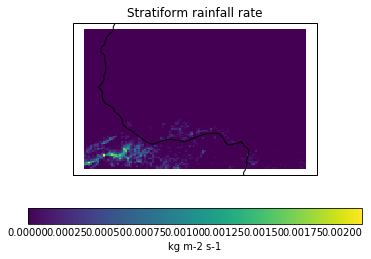

In [10]:
qplt.pcolormesh(precip[0]) # plot the first time in the cube
plt.gca().coastlines()

#### Extract Guana region (by Courtesy of Michael)

In [28]:
# Create a constraint for the latitude and Longitude extents 

N_Guana_lat = iris.Constraint(latitude=lambda v: v >= 8 and v <= 11 )
N_Guana_lon = iris.Constraint(longitude=lambda v: v >= -3.5 and v <= 1.2 )

S_Guana_lat = iris.Constraint(latitude=lambda v: v >= 4.5 and v <= 8 )
S_Guana_lon = iris.Constraint(longitude=lambda v: v >= -3.5 and v <= 1.2 )

N_Guana_precip =  precip.extract(N_Guana_lat & N_Guana_lon) 
S_Guana_precip =  precip.extract(S_Guana_lat & S_Guana_lon) 

In [12]:
print (N_Guana_precip)
print (S_Guana_precip)

stratiform_rainfall_rate / (kg m-2 s-1) (time: 3600; latitude: 13; longitude: 14)
     Dimension coordinates:
          time                               x               -              -
          latitude                           -               x              -
          longitude                          -               -              x
     Attributes:
          CDI: Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.5
          PP_LBPROC: 128
          PP_LBTIM: 122
          PP_MEAN_PERIOD: 1.0
          STASH: m01s04i203
          contact: rachel.stratton@metoffice.gov.uk
          copyright: (C) Crown Copyright, 2015 the Met Office
          experiment: CP4
          experiment_id: ac144
          institution: Met Office Hadley Centre
          institution_id: MOHC
          model: Regional GA7 configuration on Africa 4.5 km
          model_id: mean
        

#### Plot some data to check

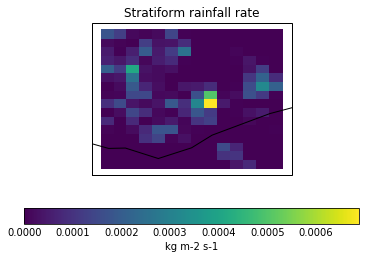

In [13]:
qplt.pcolormesh(S_Guana_precip[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

#### Save to new NetCDF files for the extracted region

In [9]:
# iris.save(W_Africa_precip, DATA_PATH + 'W_Africa_chirps.nc')

#### Open the NetCDF file for the extracted region

In [10]:
# W_Africa_file = iris.load(DATA_PATH + 'W_Africa_chirps.nc')
# W_Africa_precip = W_Africa_file[0]
# print (W_Africa_precip)

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 162; longitude: 160)
     Dimension coordinates:
          time                                                             x                -               -
          latitude                                                         -                x               -
          longitude                                                        -                -               x
     Attributes:
          Conventions: CF-1.7
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          creator_name: Pete Peterson
          date_created: 2015-10-07
          documentation: http://pubs.usgs.gov/ds/832/
          faq: http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
          ftp_url: ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/produ

#### Create seasonal means

In [29]:
coord_cat.add_season(N_Guana_precip, 'time', name='clim_season')
coord_cat.add_season_year(N_Guana_precip, 'time', name='season_year')

coord_cat.add_season(S_Guana_precip, 'time', name='clim_season')
coord_cat.add_season_year(S_Guana_precip, 'time', name='season_year')

In [30]:
print(S_Guana_precip)

stratiform_rainfall_rate / (kg m-2 s-1) (time: 3600; latitude: 16; longitude: 14)
     Dimension coordinates:
          time                               x               -              -
          latitude                           -               x              -
          longitude                          -               -              x
     Auxiliary coordinates:
          clim_season                        x               -              -
          season_year                        x               -              -
     Attributes:
          CDI: Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.5
          PP_LBPROC: 128
          PP_LBTIM: 122
          PP_MEAN_PERIOD: 1.0
          STASH: m01s04i203
          contact: rachel.stratton@metoffice.gov.uk
          copyright: (C) Crown Copyright, 2015 the Met Office
          experiment: CP4
          experiment

In [31]:
N_Guana = N_Guana_precip.aggregated_by(
    ['clim_season', 'season_year'],
    iris.analysis.MEAN)

S_Guana = S_Guana_precip.aggregated_by(
    ['clim_season', 'season_year'],
    iris.analysis.MEAN)

In [32]:
for season, year in zip(
    S_Guana.coord('clim_season')[:10].points,
    S_Guana.coord('season_year')[:10].points):
    print(season + ' ' + str(year))

mam 1997
jja 1997
son 1997
djf 1998
mam 1998
jja 1998
son 1998
djf 1999
mam 1999
jja 1999


#### Plot some data to check

stratiform_rainfall_rate / (kg m-2 s-1) (time: 40; latitude: 16; longitude: 14)
     Dimension coordinates:
          time                               x             -              -
          latitude                           -             x              -
          longitude                          -             -              x
     Auxiliary coordinates:
          clim_season                        x             -              -
          season_year                        x             -              -
     Attributes:
          CDI: Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.5
          PP_LBPROC: 128
          PP_LBTIM: 122
          PP_MEAN_PERIOD: 1.0
          STASH: m01s04i203
          contact: rachel.stratton@metoffice.gov.uk
          copyright: (C) Crown Copyright, 2015 the Met Office
          experiment: CP4
          experiment_id: ac144
 

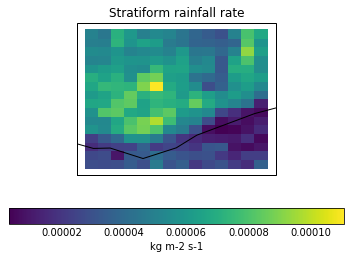

In [33]:
print(S_Guana)
qplt.pcolormesh(S_Guana[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

#### Create areal-average time series for Guana

In [36]:
grid_area_weights = iris.analysis.cartography.area_weights(N_Guana)

# Perform the area-weighted mean using the computed grid-box areas.
N_Guana_mean = N_Guana.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)

In [35]:
grid_area_weights = iris.analysis.cartography.area_weights(S_Guana)

# Perform the area-weighted mean using the computed grid-box areas.
S_Guana_mean = S_Guana.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)

#### Extract JJA data

In [37]:
jja_constraint = iris.Constraint(clim_season='jja')

N_Guana_jja = N_Guana_mean.extract(jja_constraint)
S_Guana_jja = S_Guana_mean.extract(jja_constraint)

print(N_Guana_jja)
print(S_Guana_jja)

stratiform_rainfall_rate / (kg m-2 s-1) (time: 10)
     Dimension coordinates:
          time                               x
     Auxiliary coordinates:
          clim_season                        x
          season_year                        x
     Scalar coordinates:
          latitude: 9.4921875 degrees, bound=(7.96875, 11.015625) degrees
          longitude: -1.0556640625 degrees, bound=(-3.5166015625, 1.4052734375) degrees
     Attributes:
          CDI: Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.5
          PP_LBPROC: 128
          PP_LBTIM: 122
          PP_MEAN_PERIOD: 1.0
          STASH: m01s04i203
          contact: rachel.stratton@metoffice.gov.uk
          copyright: (C) Crown Copyright, 2015 the Met Office
          experiment: CP4
          experiment_id: ac144
          institution: Met Office Hadley Centre
          institution_id: MOHC
   

Text(0.5, 1.0, 'North Guana JJA Precip')

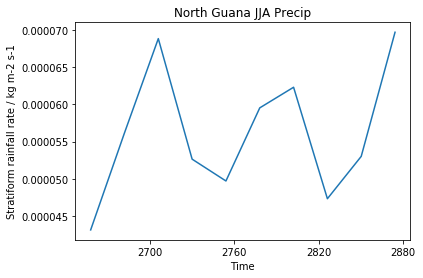

In [38]:
qplt.plot(N_Guana_jja)
plt.title('North Guana JJA Precip')

Text(0.5, 1.0, 'South Guana JJA Precip')

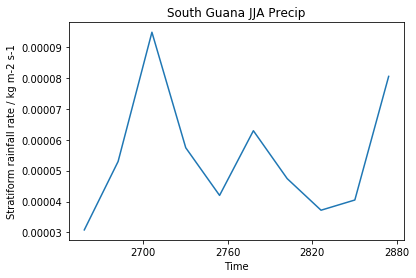

In [39]:
qplt.plot(S_Guana_jja)
plt.title('South Guana JJA Precip')

In [40]:
iris.save (N_Guana_jja, 'N_Guana_CP4.nc')
iris.save (S_Guana_jja, 'S_Guana_CP4.nc')